## Name: Chinedu Onyeka
### DATA 1202: Data Analysis Tools - Assignment 2 Part B

### Step 1. Import the necessary libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Import the dataset and print the first five records. 

In [2]:
# Read the dataset and print the first five records
crime = pd.read_csv("crime.csv")
crime.head(n = 5)

,Year,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,9360,21420,130390,203050,1213200,2514400,472800


### Step 3. What is the type of the columns?

In [3]:
# Show column types
crime.dtypes

Year                  int64
Population            int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

### Step 4. Generate descriptive statistics

In [4]:
# Descriptive statistics
crime.describe()

,Year,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,55.00000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1987.00000,2.461556e+08,17317.236364,72714.800000,416449.890909,6.811818e+05,2.424017e+06,5.959947e+06,1.028614e+06
std,16.02082,4.166216e+07,4267.442664,28278.006893,150506.403782,2.960255e+05,7.259004e+05,1.846401e+06,3.455693e+05
min,1960.00000,1.793232e+08,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,1973.50000,2.106215e+08,14819.000000,53400.000000,354911.500000,4.384300e+05,2.105336e+06,4.843350e+06,7.896260e+05
50%,1987.00000,2.422829e+08,17030.000000,84230.000000,423557.000000,7.412910e+05,2.329950e+06,6.591900e+06,1.032200e+06
75%,2000.50000,2.833697e+08,20561.500000,92930.000000,512137.000000,9.002150e+05,3.073600e+06,7.168450e+06,1.239302e+06
max,2014.00000,3.188571e+08,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


### Step 5. Add a new column "Total". 

**This column contains the total crime happened each year**

In [5]:
# Total crime per year
crime["Total"] = crime.iloc[:,2:].sum(axis = 1)
crime.head(n = 5)

,Year,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
0,1960,179323175,9110,17190,107840,154320,912100,1855400,328200,3384160
1,1961,182992000,8740,17220,106670,156760,949600,1913000,336000,3487990
2,1962,185771000,8530,17550,110860,164570,994300,2089600,366800,3752210
3,1963,188483000,8640,17650,116470,174210,1086400,2297800,408300,4109470
4,1964,191141000,9360,21420,130390,203050,1213200,2514400,472800,4564620


### Step 6. Which are those years when the total crime exceeded 14000000?

In [6]:
crime[crime["Total"] > 14000000]

,Year,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
29,1989,248239000,21500,94500,578330,951710,3168200,7872400,1564800,14251440
30,1990,248709873,23440,102560,639270,1054860,3073900,7945700,1635900,14475630
31,1991,252177000,24700,106590,687730,1092740,3157200,8142200,1661700,14872860
32,1992,255082000,23760,109060,672480,1126970,2979900,7915200,1610800,14438170
33,1993,257908000,24530,106010,659870,1135610,2834800,7820900,1563100,14144820


The years when total crime exceeded 14,000,000 are: 1989, 1990, 1991, 1992, and 1993

### Step 7. Find the year when crime was at its minimum.

In [7]:
crime[crime["Total"] == crime["Total"].min()]

,Year,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
0,1960,179323175,9110,17190,107840,154320,912100,1855400,328200,3384160


The year when crime is at its minimum is 1960

### Step 8. When was the most dangerous and the safest decade to live in this country?

**Hint:** https://www.thetopsites.net/article/54003707.shtml

In [8]:
# Get the Total crimes by decade

# Reset the index to year
crime_new_index = crime.set_index("Year")
crime_new_index.head()
crime_decade=crime_new_index.groupby((crime_new_index.index//10)*10).sum()
# Reset the index back to before
crime_decade = crime_decade.reset_index()
# Rename the Year column to Decade to be more intuitive
crime_decade = crime_decade.rename(columns = {"Year" : "Decade"})
crime_decade

,Decade,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
0,1960,1915053175,106180,236720,1633510,2158520,13321100,26547700,5292100,49295830
1,1970,2121193298,192230,554570,4159020,4702120,28486000,53157800,9739900,100991640
2,1980,2371370069,206439,865639,5383109,7619130,33073494,72040253,11935411,131123475
3,1990,2612825258,211664,998827,5748930,10568963,26750015,77679366,14624418,136582183
4,2000,2947969117,163068,922499,4230366,8652124,21565176,67970291,11412834,114916358
5,2010,1570146307,72867,421059,1749809,3764142,10125170,30401698,3569080,50103825


In [9]:
# Get the most dangerous decade. i.e Decade with the maximum Total crime
crime_decade[crime_decade["Total"] == crime_decade["Total"].max()]

,Decade,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
3,1990,2612825258,211664,998827,5748930,10568963,26750015,77679366,14624418,136582183


The most dangerous decade to live in this country is the 1990's

In [10]:
# Get the safest decade. i.e Decade with the minimum Total crime
crime_decade[crime_decade["Total"] == crime_decade["Total"].min()]

,Decade,Population,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
0,1960,1915053175,106180,236720,1633510,2158520,13321100,26547700,5292100,49295830


The safest decade to live in this country is the 1960's

### Step 9. Visualize the Crime Rate

**Based on the visualization identify which crime is the most frequent and less frequent. Violent Crime OR Property Crime** 

In [11]:
x = crime_decade["Decade"]
y = ["Murder", "Forcible_Rape", "Robbery", "Aggravated_assault", "Burglary", "Larceny_Theft", "Vehicle_Theft"]

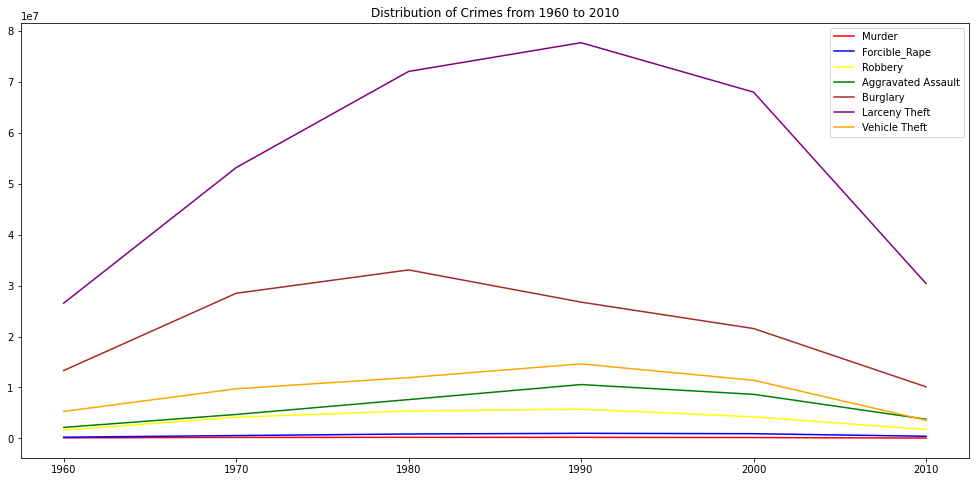

In [12]:
plt.figure(figsize=(17,8))
plt.plot(x, crime_decade["Murder"], color = "red", label = "Murder")
plt.plot(x, crime_decade["Forcible_Rape"], color = "blue", label = "Forcible_Rape")
plt.plot(x, crime_decade["Robbery"], color = "yellow", label = "Robbery")
plt.plot(x, crime_decade["Aggravated_assault"], color = "green", label = "Aggravated Assault")
plt.plot(x, crime_decade["Burglary"], color = "brown", label = "Burglary")
plt.plot(x, crime_decade["Larceny_Theft"], color = "purple", label = "Larceny Theft")
plt.plot(x, crime_decade["Vehicle_Theft"], color = "orange", label = "Vehicle Theft")
plt.title("Distribution of Crimes from 1960 to 2010")
plt.legend()

From the distribution, the type of crime that is most common is Larceny Theft while the crime that is less frequent is Murder

### Step 10. Find two other compelling findings from the given dataset. 

Text(0.5, 1.0, 'Distribution of Total crimes from 1960 to 2010')

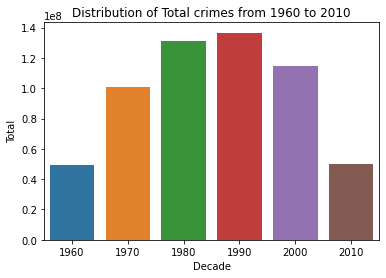

In [13]:
sns.barplot(data = crime_decade, x = "Decade", y = "Total")

plt.title("Distribution of Total crimes from 1960 to 2010")

Text(0.5, 1.0, 'Distribution of Total crimes from 1960 to 2010')

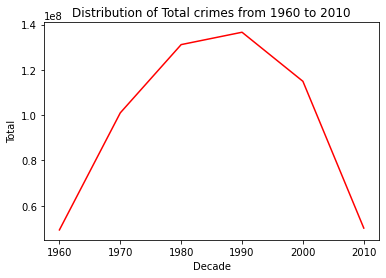

In [14]:
sns.lineplot(data = crime_decade, x = "Decade", y = "Total", color = "red")
plt.title("Distribution of Total crimes from 1960 to 2010")

One major findings from the given dataset is that crime increased from the 1960's and peaked in the 90's, then decreased from the 1990's to 2010. Another major findings is that there are more Burglary crimes than Forcible Rape crimes